<a href="https://www.kaggle.com/code/mohamedabidi97/eda-randomforest-88-heart-disease?scriptVersionId=110703472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

***
# Welcome to my notebook 🙋‍♂️

### If you like it, Upvote it 🚀

##### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


***

<img src="https://ucsdnews.ucsd.edu/news_uploads/heart-stiff-arrhythmia.jpg"><br>

<h1 id="section1" style="color: #1d3557;">1- Import Librairies</h1>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/kaggle/input/heart-failure-prediction/heart.csv


<h1 id="section2" style="color: #1d3557;">2- Meet and Greet Data</h1>

In [2]:
df= pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

<h1 id="section3" style="color: #1d3557;">3- Explanation of Columns in the dataset</h1>

***
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB




***

- The Dataset contains only non-null values, so no need to process the missings values.

- Some Column type needs to change

***

In [5]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = df.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

<h1 id="section4" style="color: #1d3557;">4 - Descriptive Statistics</h1>


In [8]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [9]:
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


<h1 id="section5" style="color: #1d3557;">5 - Exploratory Analysis </h1>


   ## 5-1 Categorical Features :
   ### 5-1-1 Binary Features

In [10]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = df[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df[df[target]=="No"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(df[df[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

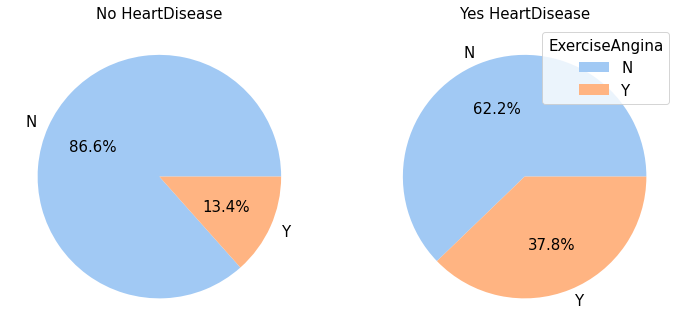

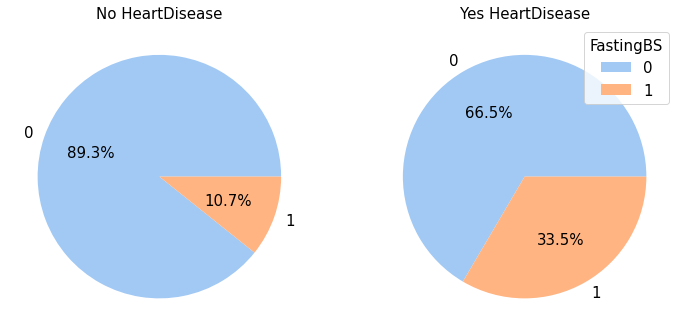

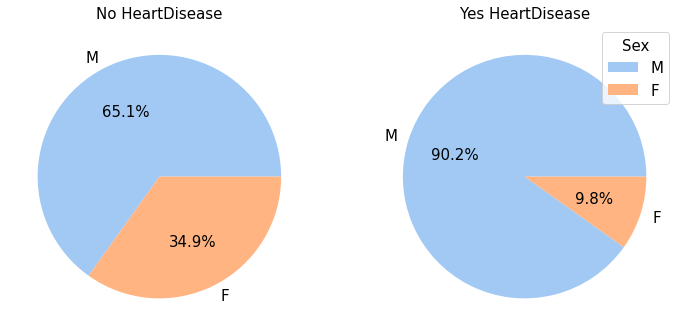

In [11]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(df,feature,"HeartDisease")

In [12]:
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df[feature]==feature_values[0])])
    num_first_value = len(df[df[feature]==feature_values[0]])

    second_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df[feature]==feature_values[1])])
    num_second_value = len(df[df[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

In [13]:
probability_calculation('Sex', ['M', 'F'])


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


***

### 💡 Interpretation :
Sex of Patient :
 - Most heart disease patients are Male than Females
 - Males are approximately 3 times more likely to have heart disease than females

***

In [14]:
probability_calculation('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


***

### 💡 Interpretation :
Angina pectoris caused by exercise :
- 37% of heart Disease Patients have Angina pectoris.
- With Angina, the probability of having heart disease is hight ( Good feature ) 

***

In [15]:
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


***

### 💡 Interpretation :
Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] :
- 33.5% of heart Disease Patients have Fasting blood sugar > 120mg.
- Fasting blood sugar > 120mg, the probability of having heart disease is almost 0.8 ( High ) 

***

### 5-1-2 Multiclass Features

In [16]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

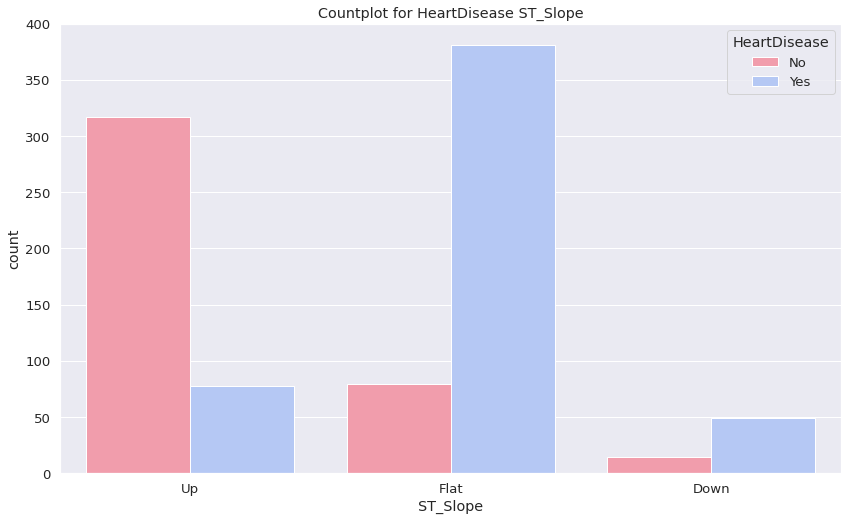

In [17]:
distribution_categorical_features(df, "ST_Slope", "HeartDisease", ["#ff8fa3","#abc4ff"])

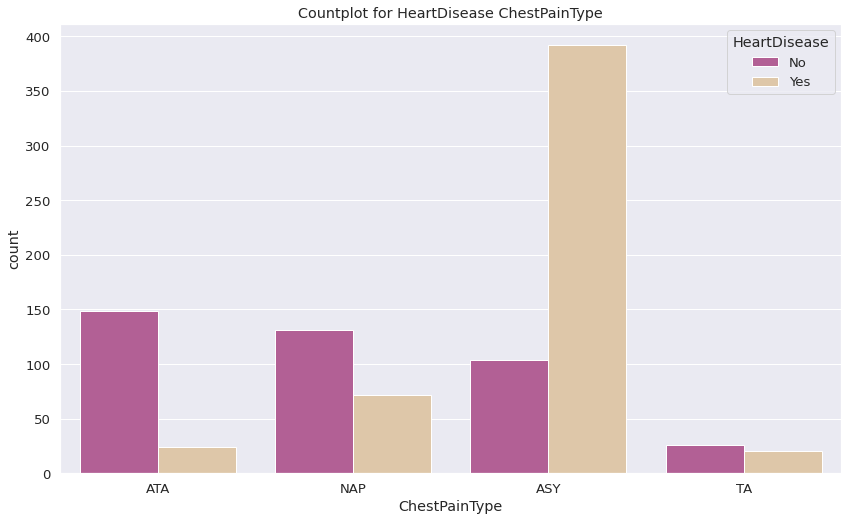

In [18]:
distribution_categorical_features(df, "ChestPainType", "HeartDisease", ["#c05299","#e7c8a0"])

***
### 💡 Interpretation

- Most Heart Disease Patients have Chest Pain with an Asymptomatic (ASY) type.
- Most Patients who have Atypical Angina (ATA) type don't have Heart Disease.

***

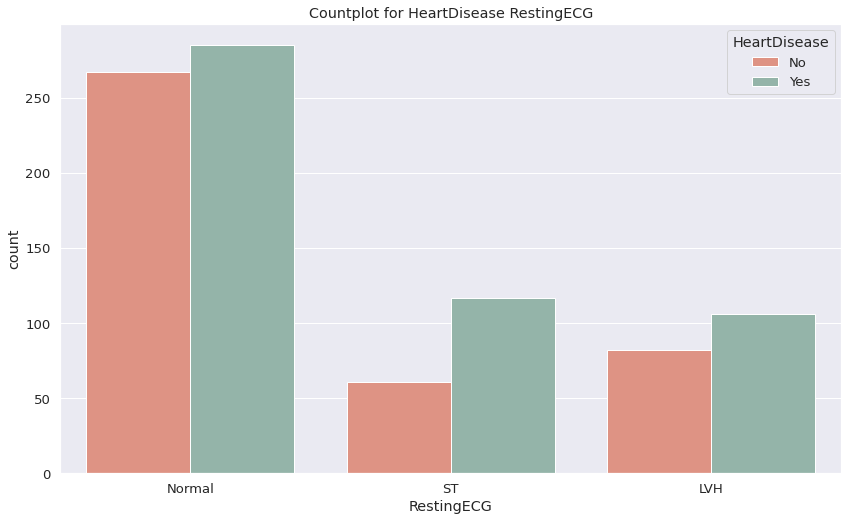

In [19]:
distribution_categorical_features(df, "RestingECG", "HeartDisease", ["#ED8975","#8FB9AA"])

***

### 💡 Interpretation :

- More than 500 patients have a normal resting ECG
- But I think it's not a criterion for detecting heart disease because it's a bit balanced between no heart disease and the existence of the disease

***

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

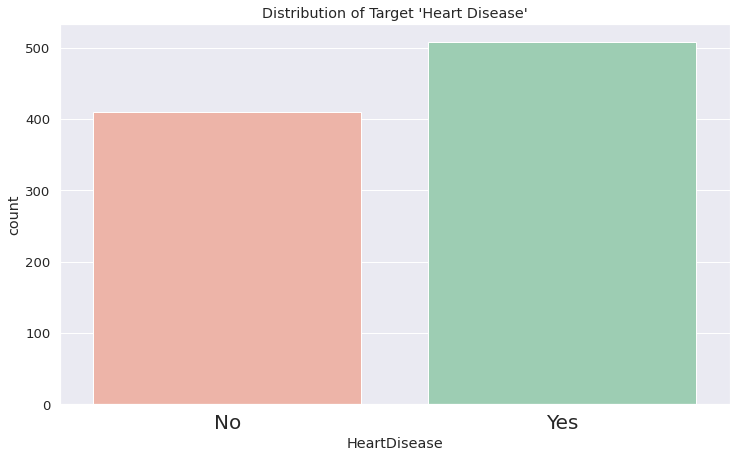

In [20]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

***
### 💡  Interpretation : 

- Target Data is balanced 🤠

***


## 5-2 Numerical Features :


In [21]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]=='Yes'][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df[target]=='No'][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

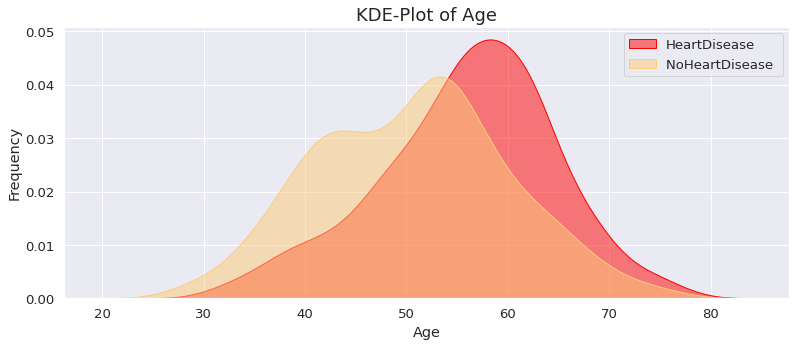

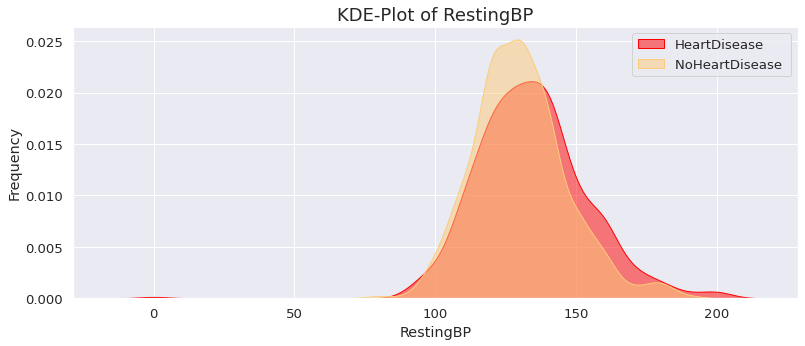

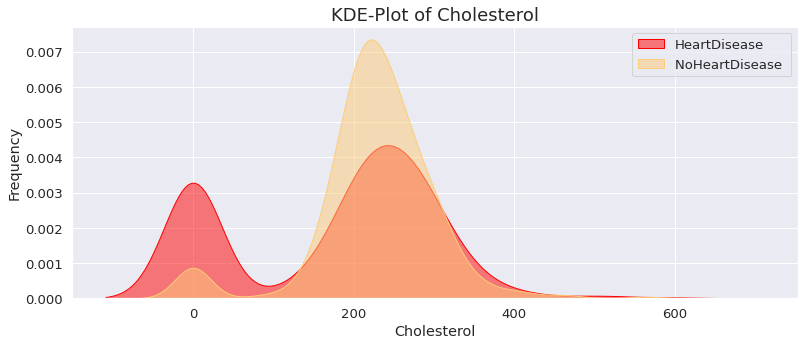

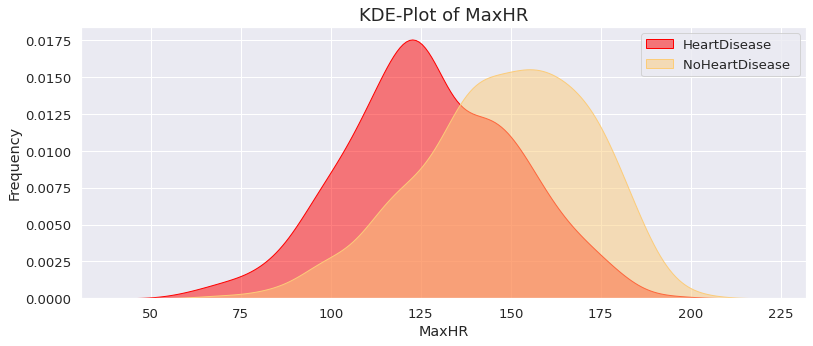

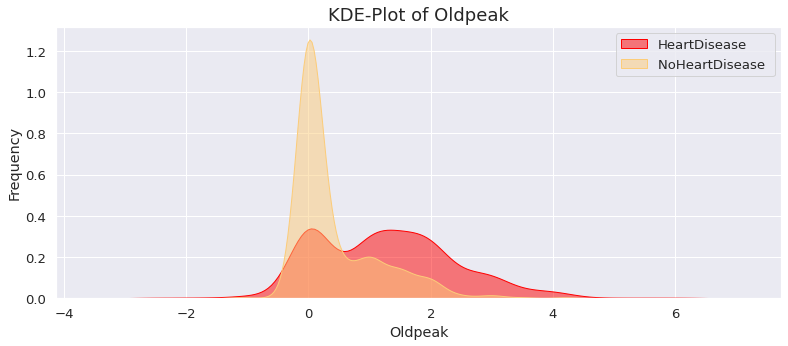

In [22]:
for column in numerical_columns : 
    kde_numerical_features(column, 'HeartDisease')

## Summary KDE-plot and Descriptive Statistics of Numerical features : 


<div class="alert alert-block alert-success">  
<dl>
<dt style="color: black" >📍 Age : </dt>
    <dd>- Average Age is 53.</dd>
    <dd>- Maximum Age is 77</dd>
    <dd>- Minimum Age is 28</dd>
    <dd>- Most of heart disease Patients have age between 55 and 65</dd>
</dl>
</div>

<div class="alert alert-block alert-info">  
<dl>
<dt style="color: black">📍 OldPeak : </dt>
    <dd>- Old peak = ST depression induced by exercise relative to rest</dd>
    <dd>- Average OldPeak is 0.88</dd>
    <dd>- Maximum OldPeak is 6.2</dd> 
    <dd>- Minimum OldPeak is -2.6</dd> 
    <dd>- Most patients with 0 oldpeak, don't have Heart disease</dd>
</dl>
</div>
<div class="alert alert-block alert-danger">  
<dl>
<dt style="color: black">📍 Cholesterol : </dt>
    <dd>- For person aged 20 years and older, the Cholesterol level should be between 125 and 200 mg/dL. <a href='https://www.verywellhealth.com/cholesterol-levels-by-age-chart-5190176'>Source</a></dd>
    <dd>- Average Cholesterol is 198.7 mg/dl</dd>
    <dd>- Maximum is 603 >>> 200 mg/dl</dd> 
    <dd>- Minimum Cholesterol is 0 => Cholesterol should be != 0</dd> 
    <dd>- Most patients with 0 oldpeak, don't have Heart disease</dd>
</dl>
</div>
<div class="alert alert-block alert-warning">  
<dl>
<dt style="color: black">📍 MaxHR : </dt>
    <dd>- There are a number of formulas out there for calculating max heart rate. The easiest and most commonly used one is to simply subtract your age from 220. So if you're 40 years old, your max heart rate would be 180 bpm. <a href='https://www.whoop.com/thelocker/calculating-max-heart-rate/'>Source</a></dd>
    <dd> - Average MaxHR is 136. Age average is 53 so based of this formula the MaxHR average will be around 167</dd>
    <dd> - Maximum is 202 >>> 200 mg/dl</dd> 
    <dd> - Minimum MaxHR is 60 => So 220 - 60 = Age = 160 years old ! hmm 🤔 </dd> 
    <dd> - Based on the formula is not logic (the oldest man in the world is 119 years old 😁 ) </dd>
    <dd> - MaxHR : Calculate your resting heart rate by counting how many times your heart beats per minute when you are at rest, such as first thing in the morning. It's usually somewhere between 60 and 100 beats per minute for the average adult.<a href="https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/exercise-intensity/art-20046887">Source</a><br>- So 60 can be a result of calculation with another formula</dd>
    <dd>- Most of tested patients with heart disease have around 120 maxHR </dd>
</dl> 
</div>
<div class="alert alert-block alert-success">  
<dl>
<dt style="color: black" >📍 RestingBP : </dt>
    <dd>- A normal blood pressure level is less than 120/80 mmHg..</dd>
    <dd>- Minimum is 0 => Must be an outlier data</dd>
    <dd>- Maximum Age is 200</dd>
    <dd>- Most tested Patients have RestingBP between 120 and 150</dd>
</dl>
</div>

In [23]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)
    

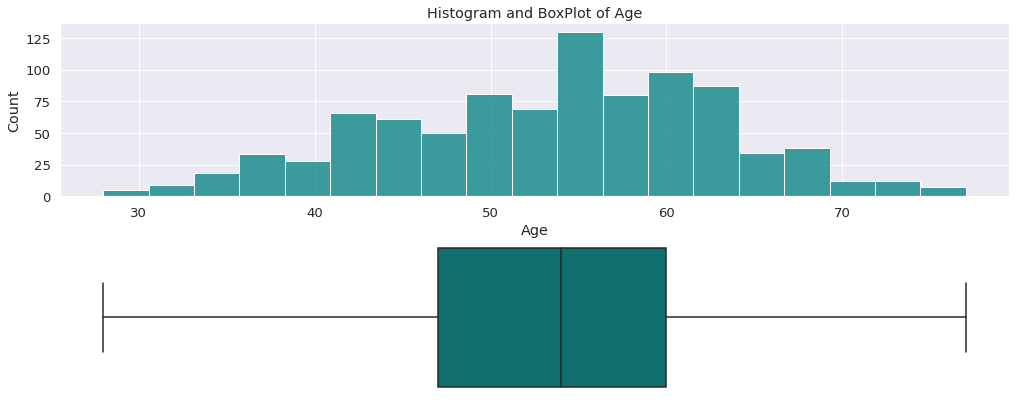

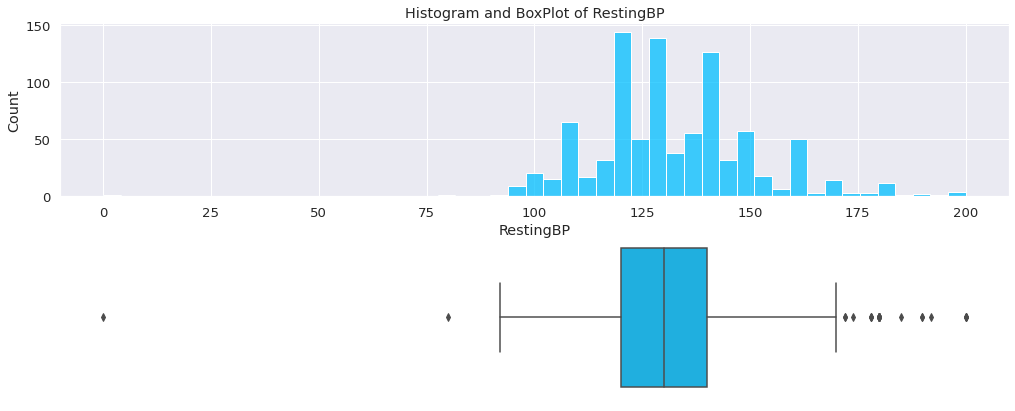

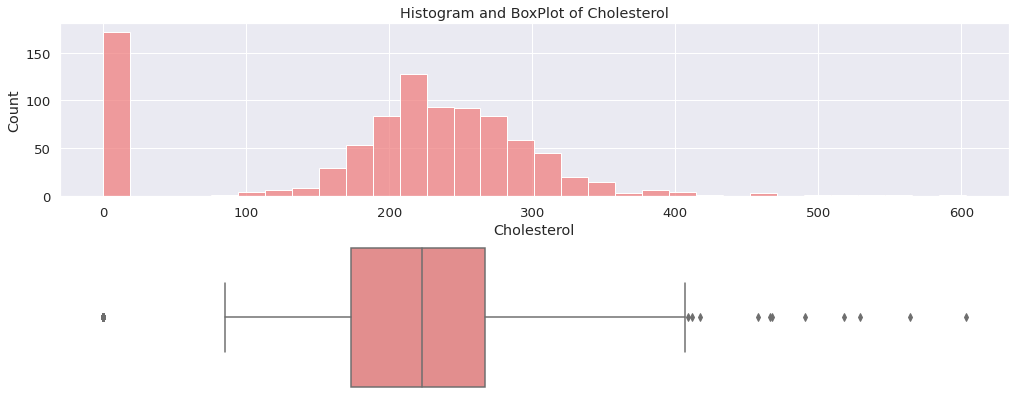

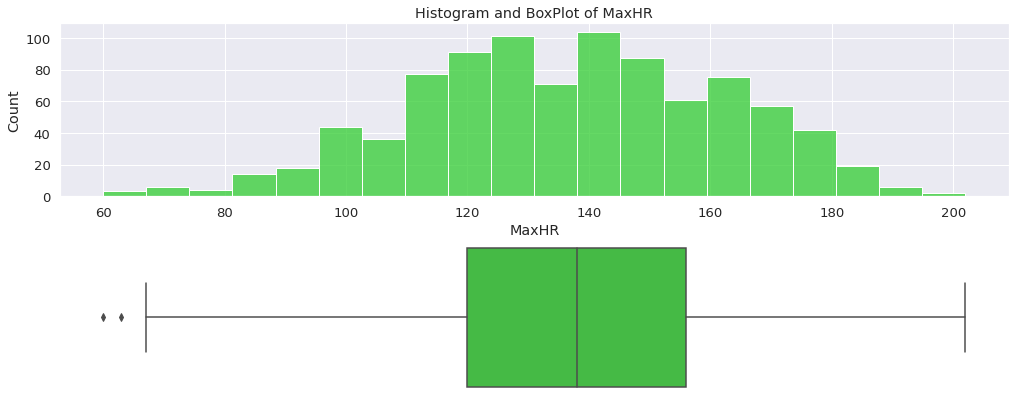

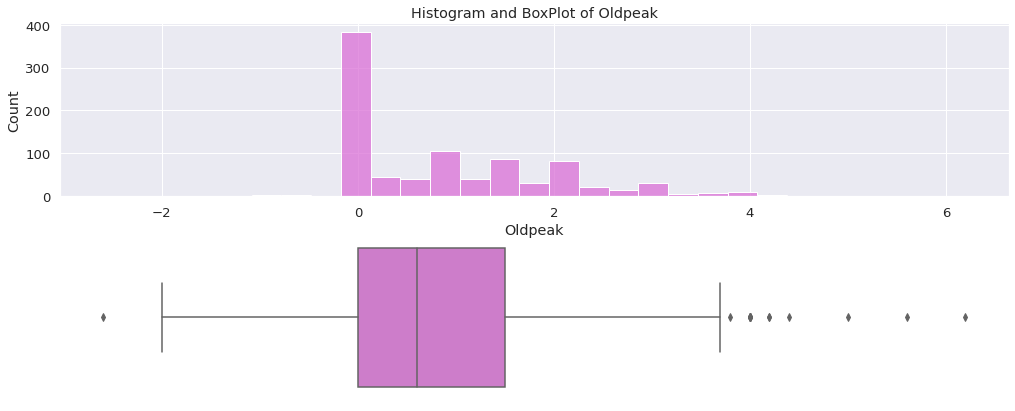

In [24]:
for col in numerical_columns:
    distribution_plot(df[col], col)

<h1 id="section6" style="color: #1d3557;">6 - Feature Engineering </h1>

### 6-1 Deleting Outliers  


In [25]:
def make_pretty(styler):
    styler.set_caption("Skewness")
    return styler.background_gradient(axis=None, cmap="YlGnBu")

df[numerical_columns].skew().to_frame().rename(columns={0: 'Skewness'}).sort_values(by=['Skewness'], ascending=False).style.pipe(make_pretty)

,Skewness
Oldpeak,1.022872
RestingBP,0.179839
MaxHR,-0.144359
Age,-0.195933
Cholesterol,-0.610086


In [26]:
df1 = df[df.Cholesterol != 0]
df1 = df1[df1.RestingBP > 70]

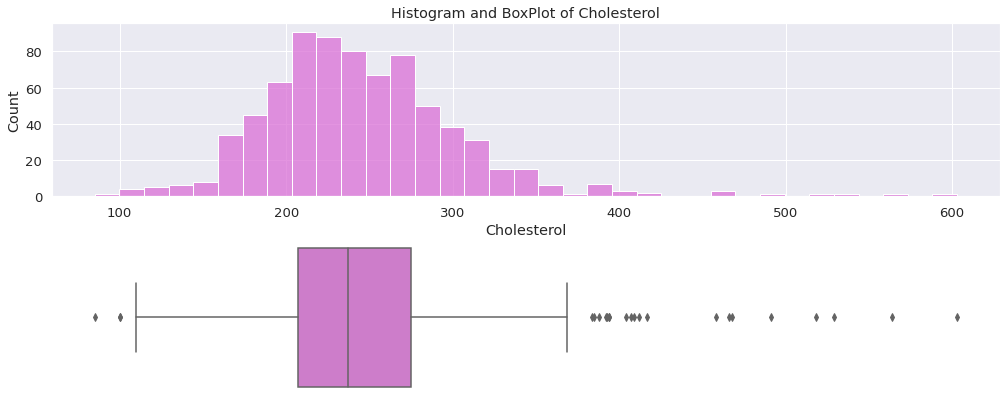

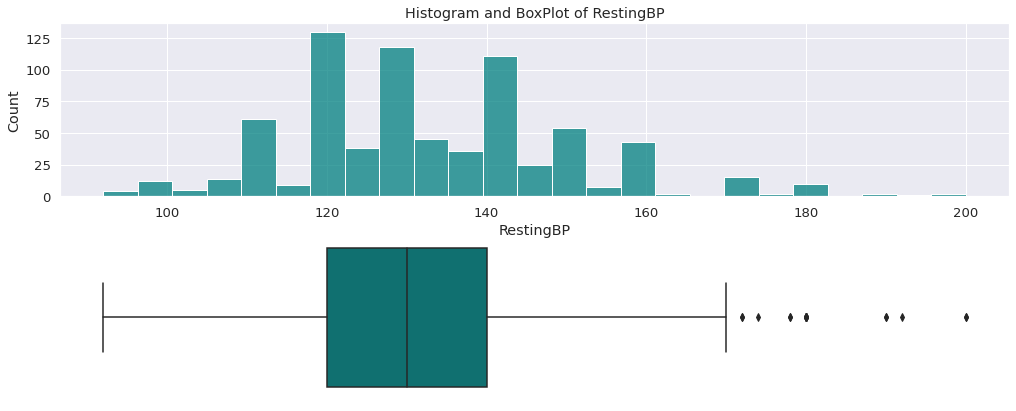

In [27]:
for col in ["Cholesterol", "RestingBP"]:
    distribution_plot(df1[col], col)

### 6-2 One Hot Encoding  & Scaling


In [28]:
final_df = pd.get_dummies(df1, columns=categorical_columns[:-1])
final_df['HeartDisease'] = final_df['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})
X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
final_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# 🎯 All about Binary Classification
<div style="text-align:center"> 
<img src="https://memegenerator.net/img/instances/73020907.jpg">
</div>
Binary classification refers to those classification tasks that have two class labels.

Examples include:

- Email spam detection (spam or not).
- Churn prediction (churn or not).
- Conversion prediction (buy or not).

Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.

For example “not spam” is the normal state and “spam” is the abnormal state. Another example is “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.

The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.

It is common to model a binary classification task with a model that predicts a Bernoulli probability distribution for each example.

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 1, or the abnormal state.

Popular algorithms that can be used for binary classification include:

***
    Logistic Regression
    k-Nearest Neighbors
    Decision Trees
    Random Forest
    Support Vector Machine
    Naive Bayes
***


Some algorithms are specifically designed for binary classification and do not natively support more than two classes; examples include Logistic Regression and Support Vector Machines.

Next, let’s take a closer look at a dataset to develop an intuition for binary classification problems.

<a href="https://machinelearningmastery.com/types-of-classification-in-machine-learning/">🔗  Source</a>

# Modeling

Let's build some simple models provided by Scikit learn library : 
***
- Logistic Regression
- Nearest Neighbors
- Support Vectors
- Nu SVC
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Naive Bayes
***

## Splitting data

In [29]:
test_size = 0.25
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = test_size, random_state=42)

## Classification metrics

In a context of a binary classification, here are the main metrics that are important to track in order to assess the performance of the model.

***Confusion matrix*** - The confusion matrix is used to have a more complete picture when assessing the performance of a model. It is defined as follows:

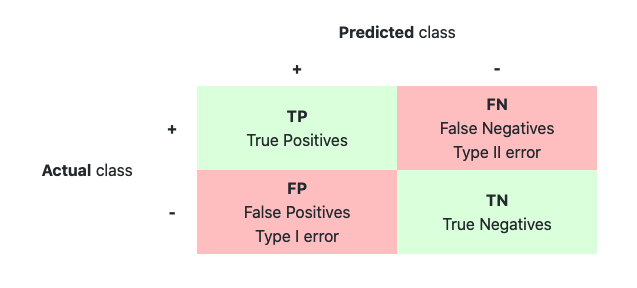

***Main metrics*** - The following metrics are commonly used to assess the performance of classification models:

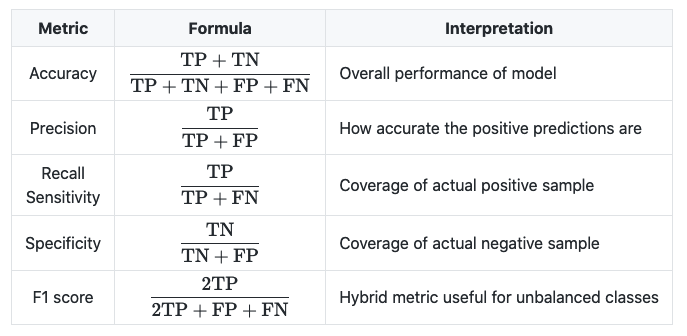


<a src="https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks#classification-metrics">🔗 Source</a>

In [30]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [31]:
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_val)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_val)
    precision[key] = precision_score(predictions, y_val)
    recall[key] = recall_score(predictions, y_val)
    f1[key] = f1_score(predictions, y_val)

<div class="alert alert-block alert-info">
💡 It is important to compare the performance of multiple different machine learning algorithms consistently.
</div>

**The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.**

In [32]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model.sort_values(by='Accuracy',ascending=False).style.background_gradient('twilight')

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.893048,0.866667,0.906977,0.886364
Naive Bayes,0.887701,0.866667,0.896552,0.881356
Support Vector Machines,0.882353,0.866667,0.886364,0.876404
K-Nearest Neighbor,0.882353,0.911111,0.854167,0.881720
Logistic Regression,0.871658,0.844444,0.883721,0.863636
Decision Trees,0.812834,0.766667,0.831325,0.797688


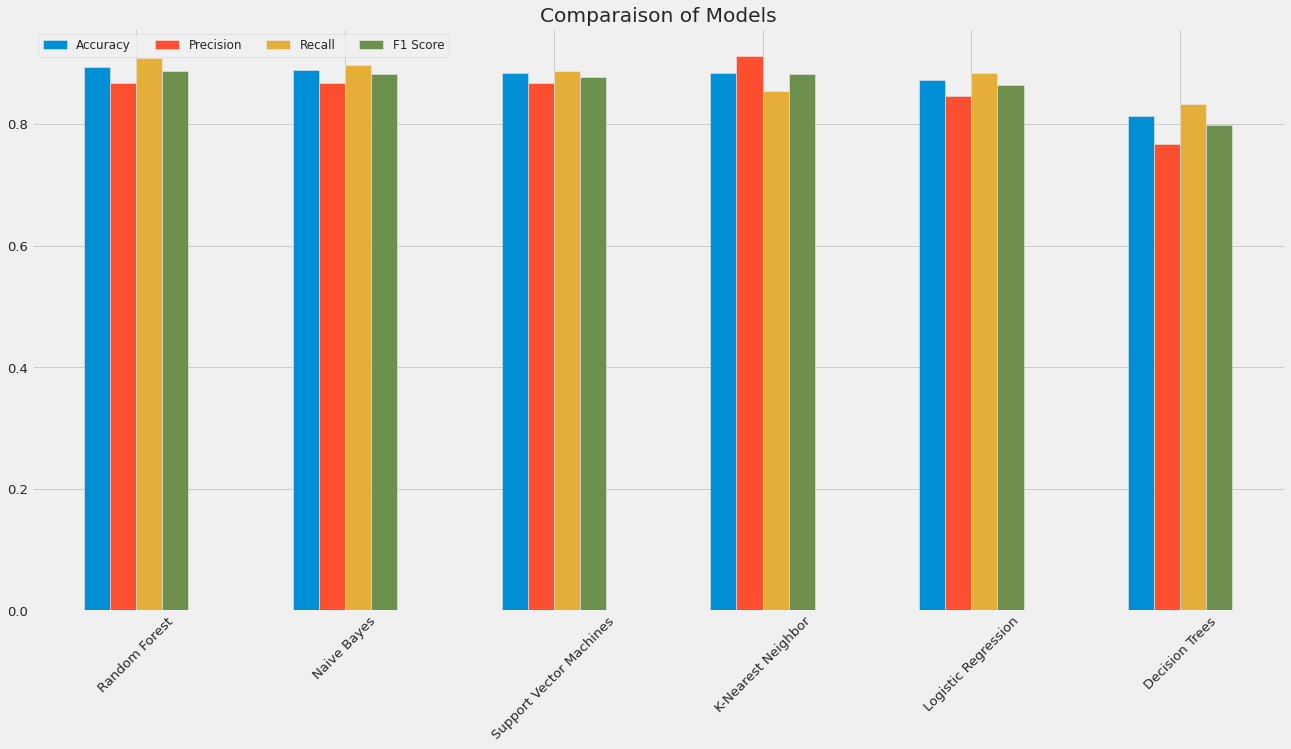

In [33]:
plt.style.use('fivethirtyeight') 
plt.rcParams["figure.figsize"] = (20,10)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 12})
ax.title.set_text('Comparaison of Models')

From the figure above we can see that our Random Forest model tops the other models in almost all the  metrics , except precision. 
So Random Forest is our base model.

## Model Optimisation

On the next part of this notebook, we will try to optimise our RandomForest model by tuning the hyper parameters available from the scikit-learn library. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

### Random Forest Hyperparameters
<div style="text-align:center"> 
<img src="https://www.sgs-latam.com/-/media/global/images/structural-website-images/hero-images/hero-agri-forestry.jpg">
</div>

In [34]:
# Create a default model
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we’ll be Looking at:

   -  ***max_depth*** - The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
   
   -  ***min_sample_split*** - a parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it.
    
   - ***max_features*** - This resembles the number of maximum features provided to each tree in a random forest..
 
 
  - ***min_samples_leaf*** - specifies the minimum number of samples that should be present in the leaf node after splitting a node.
  - ***n_estimators*** - We know that a Random Forest algorithm is nothing but a grouping of trees. But how many trees should we consider?
  
  
<p style="text-align:center">  
    <img src='https://www.tutorialandexample.com/wp-content/uploads/2019/10/Decision-Trees-Root-Node.png'><br>
    <a href='https://www.tutorialandexample.com/wp-content/uploads/2019/10/Decision-Trees-Root-Node.png'>🔗 Source</a>
</p>
    
   

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_fit = grid_search.fit(X_train, y_train)
best_parameters = grid_fit.best_params_

In [36]:
# Show the best params of grid search
best_parameters

{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [37]:
best_classifier = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_leaf=4, min_samples_split=12,max_features=2)
best_classifier.fit(X_train, y_train)
predictions = best_classifier.predict(X_val)
 
# Difference Accuracy, Precision and Recall Metrics
dif_accuracy = accuracy_score(predictions, y_val) - list(accuracy.values())[3]
dif_precision = precision_score(predictions, y_val) - list(precision.values())[3]
dif_recall = recall_score(predictions, y_val)- list(recall.values())[3]
dif_f1_score = f1_score(predictions, y_val) - list(f1.values())[3]

In [38]:
print("\n🛠 Change of {:.3f}% on Accuracy.".format(dif_accuracy*100))
print("🛠 Change of {:.3f}% on Precision.".format(dif_precision*100))
print("🛠 Change of {:.3f}% on Recall.".format(dif_recall*100))
print("🛠 Change of {:.3f}% on F1 Score.\n".format(dif_f1_score*100))


🛠 Change of 0.000% on Accuracy.
🛠 Change of 2.222% on Precision.
🛠 Change of -1.809% on Recall.
🛠 Change of 0.253% on F1 Score.



💡 The result show that our optimised performed little bit better than the original model especially the **precision > 4%**. 

The optimised model show an increase in 3 out of the 4 metrics but perform worse in the other one, which is the recall with -1.475% decrease. 

The recall is the measure of our model correctly identifying True Positives ✅  . Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease. 

<div class="alert alert-block alert-danger">
🚨    What if a patient has heart disease, but there is no treatment given to him/her because our model predicted so? That is a situation we would like to avoid!
</div>

***

👉 We want to focus on predicting as many actual positive values as possible we should stick with ***our original model*** for the prediction because it has higher recall score.

***